In [2]:
import pandas as pd

# Load only a sample (first 1000 rows) to avoid timeout
df_sample = pd.read_csv("linkedin_job_postings.csv", nrows=1000)

# Display basic overview
df_sample_overview = {
    "shape": df_sample.shape,
    "columns": df_sample.columns.tolist(),
    "preview": df_sample.head()
}

# Show preview
df_sample.head()


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [3]:
import pandas as pd

# STEP 1: Load the full dataset
df = pd.read_csv("linkedin_job_postings.csv")

# STEP 2: Preprocessing
# Keep only relevant columns, now including job_link
columns_to_keep = ["job_title", "job_link", "first_seen", "job_level", "job_type", "company"]
df_preprocessed = df[columns_to_keep].copy()

# Drop rows with missing job titles, links, or dates
df_preprocessed.dropna(subset=["job_title", "job_link", "first_seen"], inplace=True)

# Convert first_seen to datetime for time-based analysis
df_preprocessed["first_seen"] = pd.to_datetime(df_preprocessed["first_seen"], errors="coerce")

# STEP 3: Save preprocessed file
df_preprocessed.to_excel("preprocessed_jobs.xlsx", index=False)
# STEP 4: Show first few rows of preprocessed data
df_preprocessed.head()


,job_title,job_link,first_seen,job_level,job_type,company
0,Account Executive - Dispensing (NorCal/Norther...,https://www.linkedin.com/jobs/view/account-exe...,2024-01-15,Mid senior,Onsite,BD
1,Registered Nurse - RN Care Manager,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Mid senior,Onsite,Trinity Health MI
2,RESTAURANT SUPERVISOR - THE FORKLIFT,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-14,Mid senior,Onsite,Wasatch Adaptive Sports
3,Independent Real Estate Agent,https://www.linkedin.com/jobs/view/independent...,2024-01-16,Mid senior,Onsite,Howard Hanna | Rand Realty
4,Group/Unit Supervisor (Systems Support Manager...,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-17,Mid senior,Onsite,"IRS, Office of Chief Counsel"


In [4]:
import pandas as pd

# Step 1: Load your preprocessed job data
df = pd.read_excel("preprocessed_jobs.xlsx")

# Step 2: Define mapping logic based on job_title
def map_field_of_study(title):
    title = str(title).lower()
    if any(keyword in title for keyword in ["nurse", "clinic", "medical", "healthcare", "therapist", "pharmacy"]):
        return "Healthcare"
    elif any(keyword in title for keyword in ["software", "developer", "engineer", "data", "ai", "machine learning", "it", "cloud", "cybersecurity", "network"]):
        return "IT"
    elif any(keyword in title for keyword in ["finance", "accountant", "financial", "banking", "auditor"]):
        return "Finance"
    elif any(keyword in title for keyword in ["marketing", "sales", "seo", "business development", "brand"]):
        return "Business/Marketing"
    elif any(keyword in title for keyword in ["teacher", "educator", "lecturer", "tutor", "professor"]):
        return "Education"
    elif any(keyword in title for keyword in ["civil", "mechanical", "construction", "architect", "structural"]):
        return "Construction"
    else:
        return "Other"

# Step 3: Apply mapping to dataset
df["field_of_study"] = df["job_title"].apply(map_field_of_study)

# Step 4: Save the mapped output
df.to_excel("mapped_jobs.xlsx", index=False)


In [6]:
df.head()


,job_title,job_link,first_seen,job_level,job_type,company,field_of_study
0,Account Executive - Dispensing (NorCal/Norther...,https://www.linkedin.com/jobs/view/account-exe...,2024-01-15,Mid senior,Onsite,BD,Other
1,Registered Nurse - RN Care Manager,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Mid senior,Onsite,Trinity Health MI,Healthcare
2,RESTAURANT SUPERVISOR - THE FORKLIFT,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-14,Mid senior,Onsite,Wasatch Adaptive Sports,Other
3,Independent Real Estate Agent,https://www.linkedin.com/jobs/view/independent...,2024-01-16,Mid senior,Onsite,Howard Hanna | Rand Realty,Other
4,Group/Unit Supervisor (Systems Support Manager...,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-17,Mid senior,Onsite,"IRS, Office of Chief Counsel",IT


/tmp/ipython-input-8-473492990.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=field_counts.values, y=field_counts.index, palette="Set2")


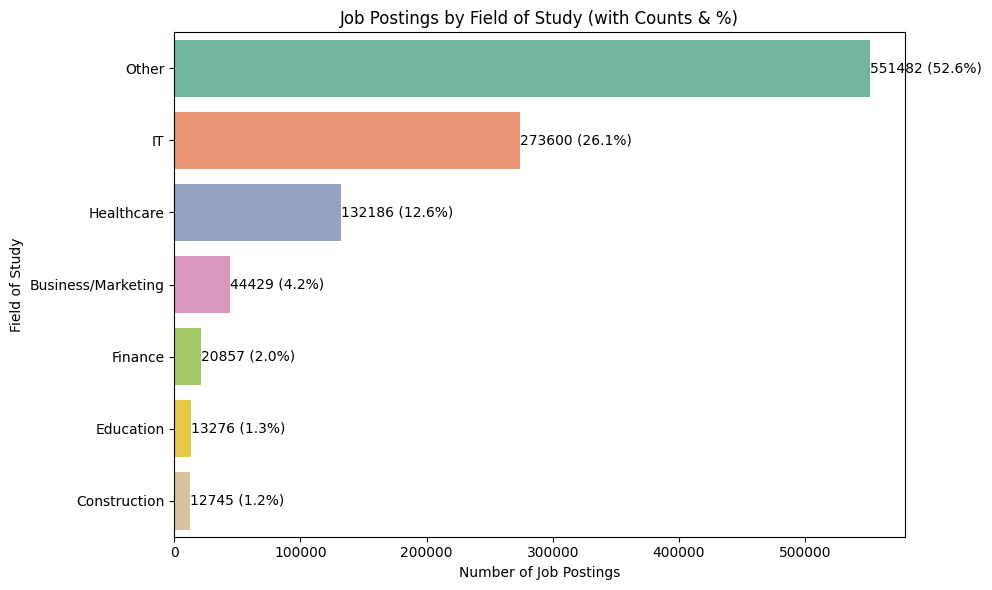

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("mapped_jobs.xlsx")

# Count job postings by field
field_counts = df["field_of_study"].value_counts()
total = field_counts.sum()
field_percentages = (field_counts / total * 100).round(1)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=field_counts.values, y=field_counts.index, palette="Set2")

# Add annotations (count + percentage)
for i, (count, pct) in enumerate(zip(field_counts.values, field_percentages)):
    ax.text(count + 5, i, f"{count} ({pct}%)", va='center')

plt.title("Job Postings by Field of Study (with Counts & %)")
plt.xlabel("Number of Job Postings")
plt.ylabel("Field of Study")
plt.tight_layout()
plt.savefig("mapped_field_bar_chart_annotated.png")
plt.show()

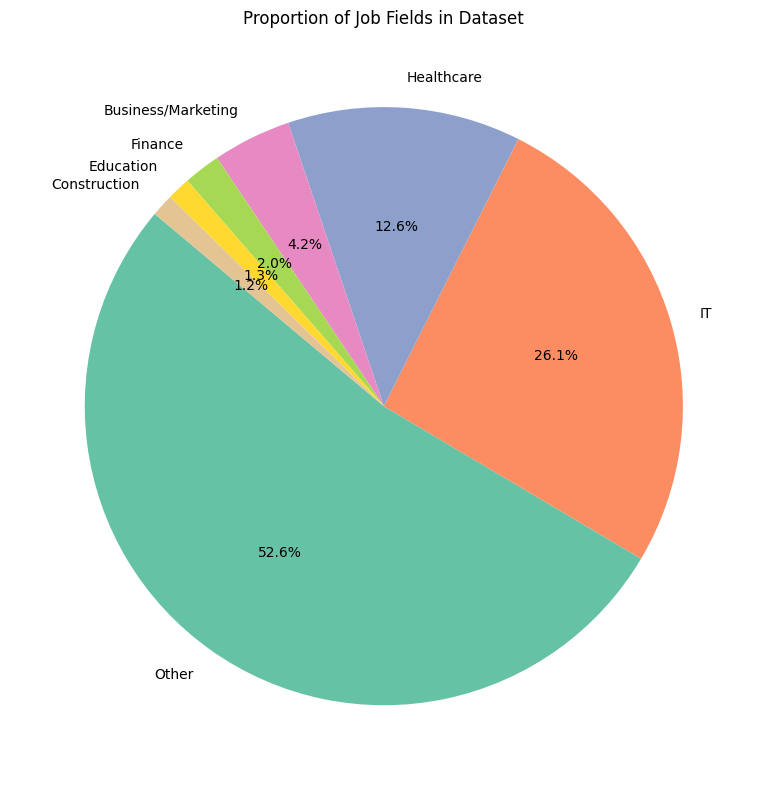

In [9]:
field_counts = df["field_of_study"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Proportion of Job Fields in Dataset")
plt.tight_layout()
plt.savefig("mapped_field_pie_chart.png")
plt.show()


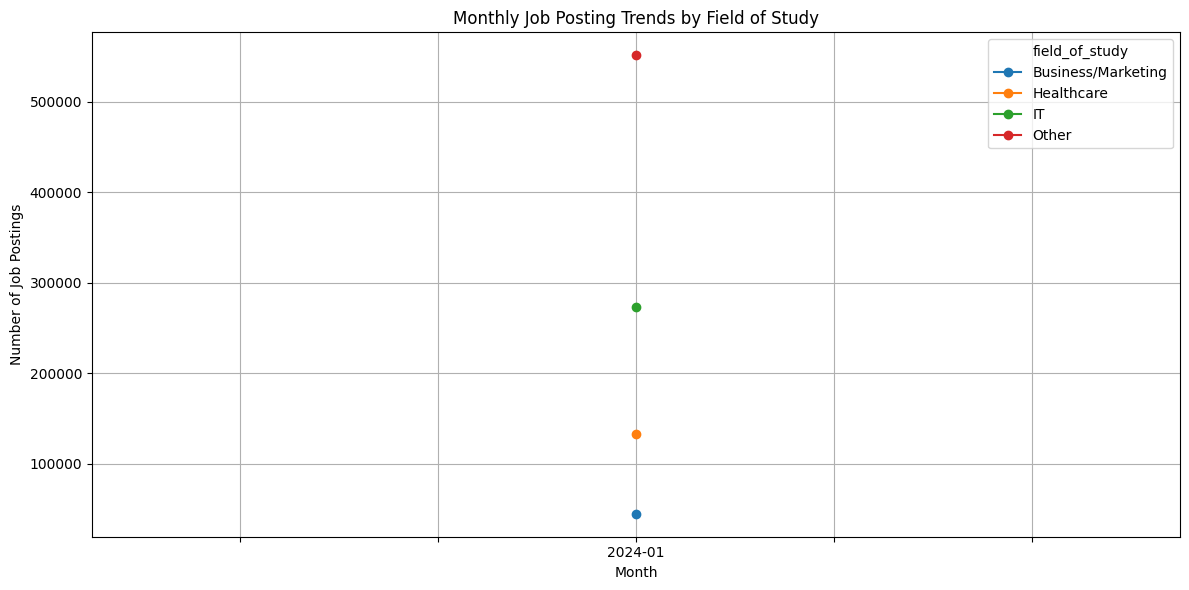

In [10]:
# Ensure datetime and extract month
df["first_seen"] = pd.to_datetime(df["first_seen"])
df["month"] = df["first_seen"].dt.to_period("M").astype(str)

# Select top 3-4 fields
top_fields = df["field_of_study"].value_counts().nlargest(4).index
df_filtered = df[df["field_of_study"].isin(top_fields)]

# Group by month and field
ts = df_filtered.groupby(["month", "field_of_study"]).size().unstack().fillna(0)

# Plot time series
ts.plot(marker='o', figsize=(12, 6))
plt.title("Monthly Job Posting Trends by Field of Study")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.grid(True)
plt.tight_layout()
plt.savefig("time_series_field_trends.png")
plt.show()


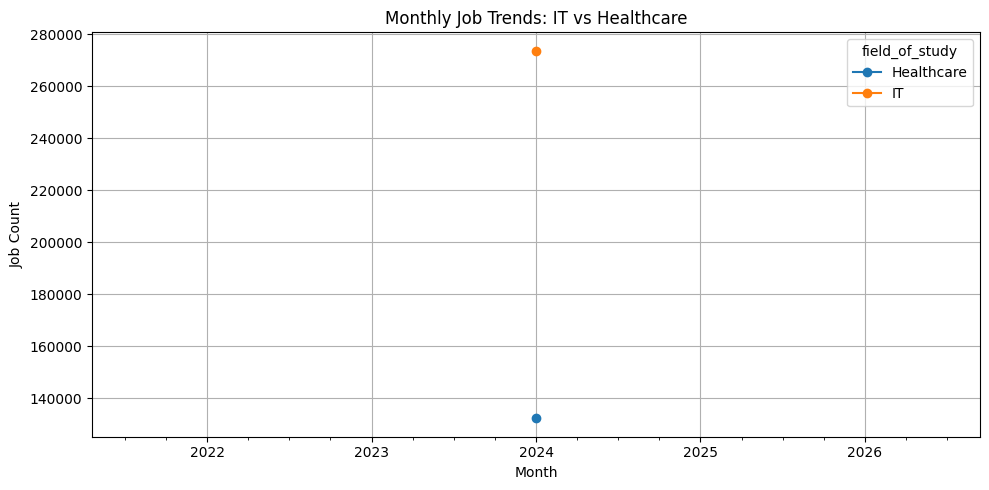

In [12]:
df['first_seen'] = pd.to_datetime(df['first_seen'])
df['month'] = df['first_seen'].dt.to_period('M')

ts_df = df[df['field_of_study'].isin(['IT', 'Healthcare'])]\
    .groupby(['month', 'field_of_study']).size().unstack().fillna(0)

ts_df.plot(figsize=(10, 5), marker='o')
plt.title("Monthly Job Trends: IT vs Healthcare")
plt.ylabel("Job Count")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.savefig("time_series_it_healthcare.png")
plt.show()


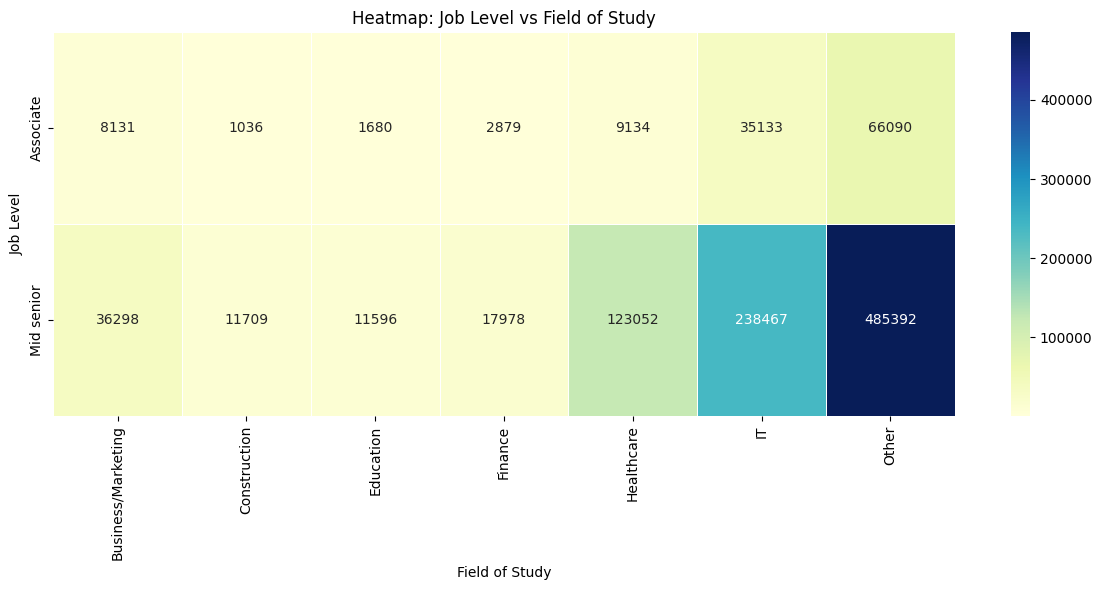

In [11]:
# Clean and filter
df = df.dropna(subset=["job_level", "field_of_study"])

# Create pivot table
pivot = df.pivot_table(index="job_level", columns="field_of_study", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap: Job Level vs Field of Study")
plt.xlabel("Field of Study")
plt.ylabel("Job Level")
plt.tight_layout()
plt.savefig("job_level_vs_field_heatmap.png")
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Load the full preprocessed dataset
df_full = pd.read_excel("preprocessed_jobs.xlsx")

# Remove rows with missing job titles
df_full.dropna(subset=["job_title"], inplace=True)

# Clean job titles (convert to lowercase for uniformity)
df_full["job_title_clean"] = df_full["job_title"].str.lower()

# Vectorize all job titles using TF-IDF
vectorizer_full = TfidfVectorizer(stop_words="english")
X_full = vectorizer_full.fit_transform(df_full["job_title_clean"])

# Apply KMeans clustering with 6 clusters
kmeans_full = KMeans(n_clusters=6, random_state=42, n_init=10)
df_full["cluster"] = kmeans_full.fit_predict(X_full)

# Count job titles per cluster
cluster_counts_full = df_full["cluster"].value_counts().sort_index()

# Save clustered results
# Save the Excel file to the Colab environment
df_full[["job_title", "job_title_clean", "cluster"]].to_excel("job_titles_with_clusters_full.xlsx", index=False)

# Save the plot as PNG
plt.savefig("kmeans_cluster_distribution_full.png")


/tmp/ipython-input-9-1345341061.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts_full.index, y=cluster_counts_full.values, palette="Set2")


<Figure size 640x480 with 0 Axes>

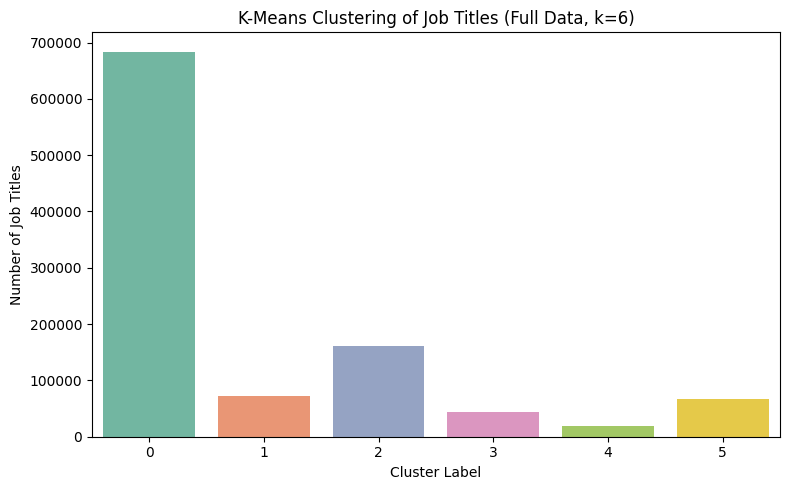

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cluster distribution (with inline display and fixed warning)
plt.figure(figsize=(8, 5))
sns.barplot(
    x=cluster_counts_full.index,
    y=cluster_counts_full.values,
    hue=cluster_counts_full.index,  # Fix for FutureWarning
    palette="Set2",
    legend=False  # Hide the duplicate legend
)
plt.title("K-Means Clustering of Job Titles (Full Data, k=6)")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Job Titles")
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-3146359423.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_skills, x='Count', y='Skill', palette='viridis')


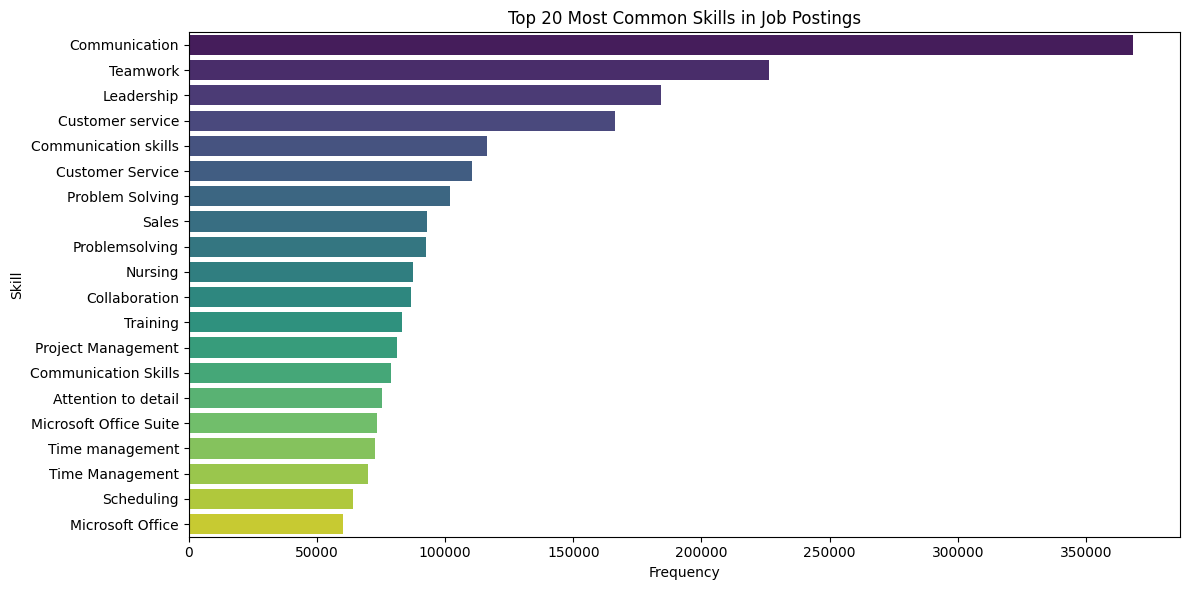

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Correct way to load CSV
df_actual = pd.read_csv("job_skills.csv")

# 🔍 Split skills and count frequencies
all_skills = df_actual['job_skills'].dropna().str.split(', ')
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]
skill_counts = Counter(flat_skills)

# 🧾 Convert to DataFrame
df_skills = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Count'])

# 📊 Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_skills, x='Count', y='Skill', palette='viridis')
plt.title("Top 20 Most Common Skills in Job Postings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("top_20_skills_bar_chart.png")
plt.show()


/tmp/ipython-input-5-2390467252.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned_skills, x='Count', y='Skill', palette='magma')


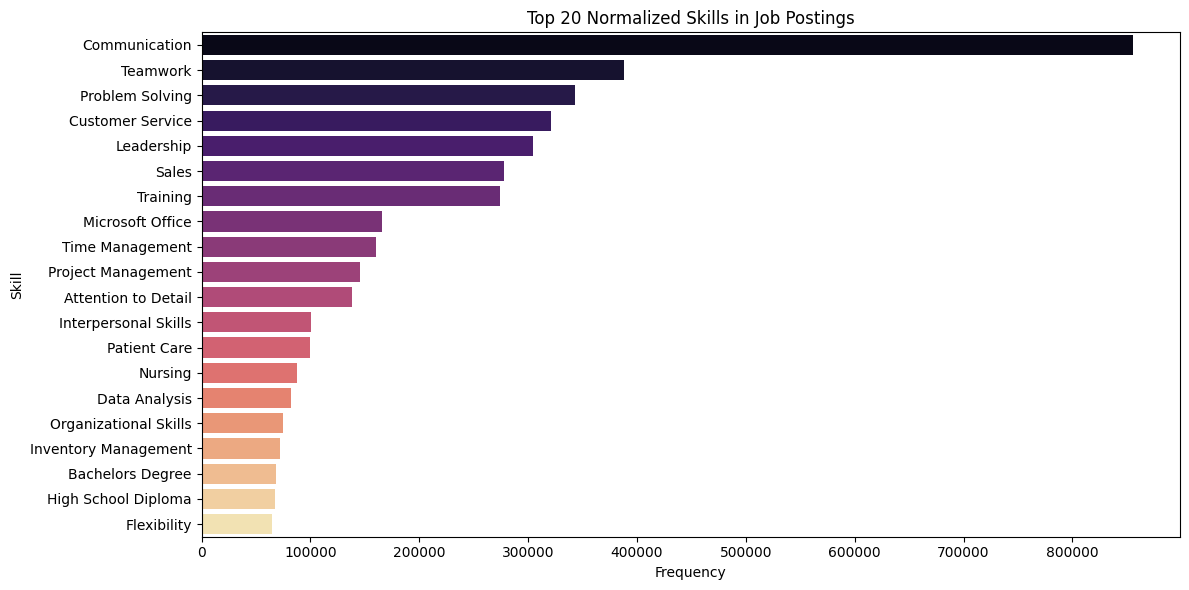

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the CSV file
df_skills_csv = pd.read_csv("job_skills.csv")

# Normalize and group similar skill variants using basic rules
def normalize_skill(skill):
    skill = skill.lower().strip()
    skill = re.sub(r'[^a-z0-9 ]', '', skill)
    if "communication" in skill:
        return "Communication"
    elif "teamwork" in skill or "collaboration" in skill:
        return "Teamwork"
    elif "customer service" in skill:
        return "Customer Service"
    elif "problem solving" in skill or "problemsolving" in skill:
        return "Problem Solving"
    elif "time management" in skill:
        return "Time Management"
    elif "attention to detail" in skill:
        return "Attention to Detail"
    elif "microsoft office" in skill:
        return "Microsoft Office"
    elif "project management" in skill:
        return "Project Management"
    elif "leadership" in skill:
        return "Leadership"
    elif "training" in skill:
        return "Training"
    elif "sales" in skill:
        return "Sales"
    elif "flexibility" in skill:
        return "Flexibility"
    else:
        return skill.title()

# Process and normalize all skills
all_skills = df_skills_csv['job_skills'].dropna().str.split(', ')
normalized_skills = [normalize_skill(skill) for sublist in all_skills for skill in sublist]
skill_counts_cleaned = Counter(normalized_skills)

# Create DataFrame of cleaned skill counts
df_cleaned_skills = pd.DataFrame(skill_counts_cleaned.most_common(20), columns=['Skill', 'Count'])

# Plot the cleaned top 20 skills
plt.figure(figsize=(12, 6))
sns.barplot(data=df_cleaned_skills, x='Count', y='Skill', palette='magma')
plt.title("Top 20 Normalized Skills in Job Postings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("top_20_skills_cleaned_bar_chart.png")
plt.show()


In [16]:
import pandas as pd

# Load both datasets
df_jobs = pd.read_excel("mapped_jobs.xlsx")
df_skills = pd.read_csv("job_skills.csv")

# Merge on job_link
df_combined = pd.merge(df_jobs, df_skills, on='job_link', how='inner')

# Optional: drop rows with no skills or field_of_study
df_combined.dropna(subset=['job_skills', 'field_of_study'], inplace=True)

# Save combined file
df_combined.to_excel("combined_jobs_skills.xlsx", index=False)


In [17]:
df_combined.head()

,job_title,job_link,first_seen,job_level,job_type,company,field_of_study,job_skills
0,Account Executive - Dispensing (NorCal/Norther...,https://www.linkedin.com/jobs/view/account-exe...,2024-01-15,Mid senior,Onsite,BD,Other,"Medical equipment sales, Key competitors, Term..."
1,Registered Nurse - RN Care Manager,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Mid senior,Onsite,Trinity Health MI,Healthcare,"Nursing, Bachelor of Science in Nursing, Maste..."
2,RESTAURANT SUPERVISOR - THE FORKLIFT,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-14,Mid senior,Onsite,Wasatch Adaptive Sports,Other,"Restaurant Operations Management, Inventory Ma..."
3,Independent Real Estate Agent,https://www.linkedin.com/jobs/view/independent...,2024-01-16,Mid senior,Onsite,Howard Hanna | Rand Realty,Other,"Real Estate, Customer Service, Sales, Negotiat..."
4,Registered Nurse (RN),https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Mid senior,Onsite,Trinity Health MI,Healthcare,"Nursing, BSN, Medical License, Virtual RN, Nur..."


In [13]:
# Re-upload and reprocess the previously used preprocessed file
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load preprocessed file (which includes job_title and other fields)
file_path = "preprocessed_jobs.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing job titles (if any)
df = df.dropna(subset=["job_title"]).copy()

# TF-IDF vectorization of job titles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["job_title"].astype(str))

# KMeans clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
df["cluster"] = kmeans.fit_predict(X)

# Extract top keywords per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

cluster_keywords = {}
for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :5]]
    cluster_keywords[i] = top_terms

# Assign keyword summary to each job
df["cluster_keywords"] = df["cluster"].map(cluster_keywords).apply(lambda x: ", ".join(x))

# Save the clustered output
df.to_excel("preprocessed_with_clusters_labeled.xlsx", index=False)

# Show cluster label summaries
cluster_keywords


{0: ['nurse', 'supervisor', 'rn', 'registered', 'service'],
 1: ['manager', 'store', 'project', 'account', 'shift'],
 2: ['assistant', 'manager', 'executive', 'general', 'administrative'],
 3: ['senior', 'accountant', 'manager', 'analyst', 'project'],
 4: ['engineer', 'senior', 'software', 'electrical', 'mechanical'],
 5: ['associate', 'sales', 'lead', 'ft', 'pt']}

/tmp/ipython-input-14-896105257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cluster", data=df, palette="Set2")


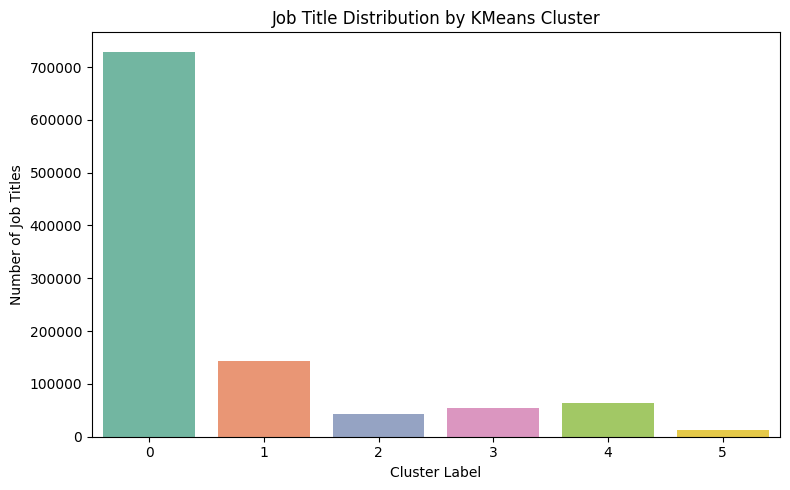

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Bar plot: Job count per cluster ---
plt.figure(figsize=(8, 5))
sns.countplot(x="cluster", data=df, palette="Set2")
plt.title("Job Title Distribution by KMeans Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Job Titles")
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-3915476262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_labels, y=[len(df[df["cluster"] == i]) for i in cluster_labels], palette="Set3")


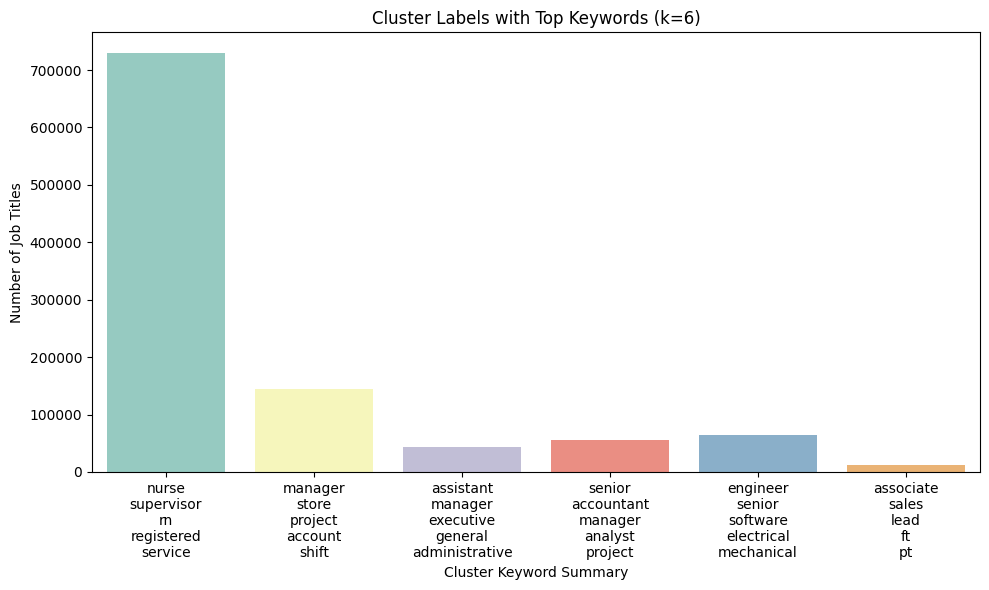

In [15]:

# --- 2. Cluster keywords visualization ---
cluster_labels = list(cluster_keywords.keys())
keywords_summary = ["\n".join(cluster_keywords[i]) for i in cluster_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_labels, y=[len(df[df["cluster"] == i]) for i in cluster_labels], palette="Set3")
plt.xticks(ticks=range(len(cluster_labels)), labels=keywords_summary, rotation=0)
plt.title("Cluster Labels with Top Keywords (k=6)")
plt.xlabel("Cluster Keyword Summary")
plt.ylabel("Number of Job Titles")
plt.tight_layout()
plt.show()